In [2]:
import numpy as np
import pandas as pd


X = pd.read_csv('independent_variable.csv')
y = pd.read_csv('dependent_variable.csv')


X = X.values
y = y.values


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs


X = np.hstack((np.ones((X.shape[0], 1)), X))

theta = np.zeros((X.shape[1], 1))


alpha = 0.1
num_iters = 1000


theta, costs = gradient_descent(X, y, theta, alpha, num_iters)


print("Cost function value after convergence:", costs[-1])
print("Learning parameter value after convergence:")
print(theta)


Cost function value after convergence: 0.22556024438511793
Learning parameter value after convergence:
[[ 0.07804028]
 [ 1.93800501]
 [-1.90093439]]


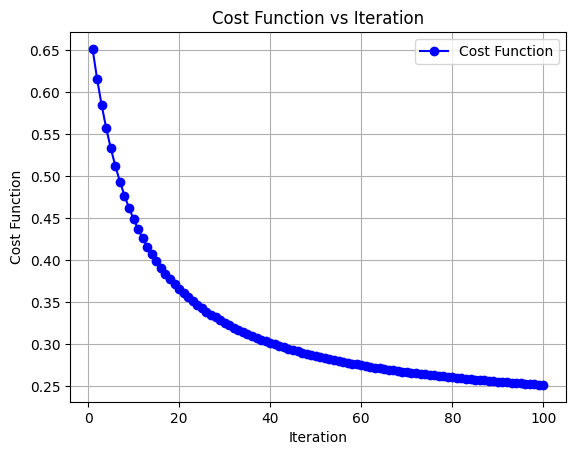

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('independent_variable.csv')
y = pd.read_csv('dependent_variable.csv')

X = X.values
y = y.values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

X = np.hstack((np.ones((X.shape[0], 1)), X))

theta = np.zeros((X.shape[1], 1))

alpha = 0.1
num_iters = 100

theta, costs = gradient_descent(X, y, theta, alpha, num_iters)

iterations = range(1, num_iters + 1)
plt.plot(iterations, costs, marker='o', color='b', label='Cost Function')
plt.title('Cost Function vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.show()


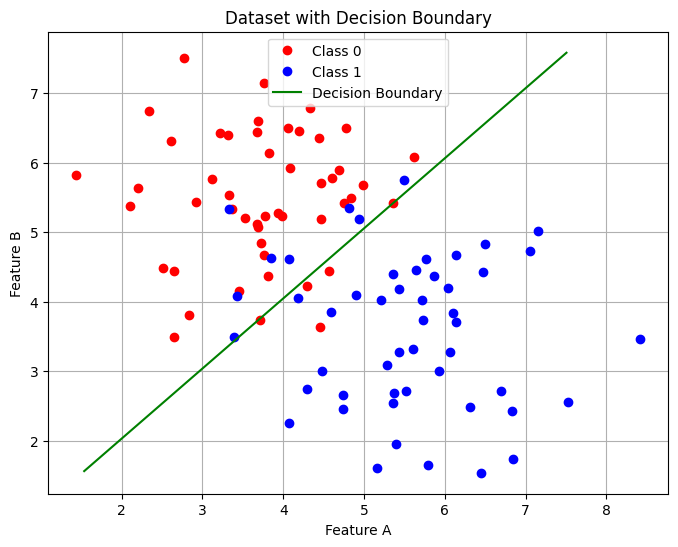

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('independent_variable.csv')
y = pd.read_csv('dependent_variable.csv')

X = X.values
y = y.values.flatten()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def decision_boundary(theta, x):
    return (-theta[0] - theta[1]*x) / theta[2]

plt.figure(figsize=(8, 6))

plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'ro', label='Class 0')

plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'bo', label='Class 1')


x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
plt.plot(x_values, [decision_boundary(theta, x) for x in x_values], color='green', label='Decision Boundary')

plt.title('Dataset with Decision Boundary')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-8-65c4d30bfe03>:24: RuntimeWarning: divide by zero encountered in log
  cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-65c4d30bfe03>:24: RuntimeWarning: invalid value encountered in multiply
  cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))


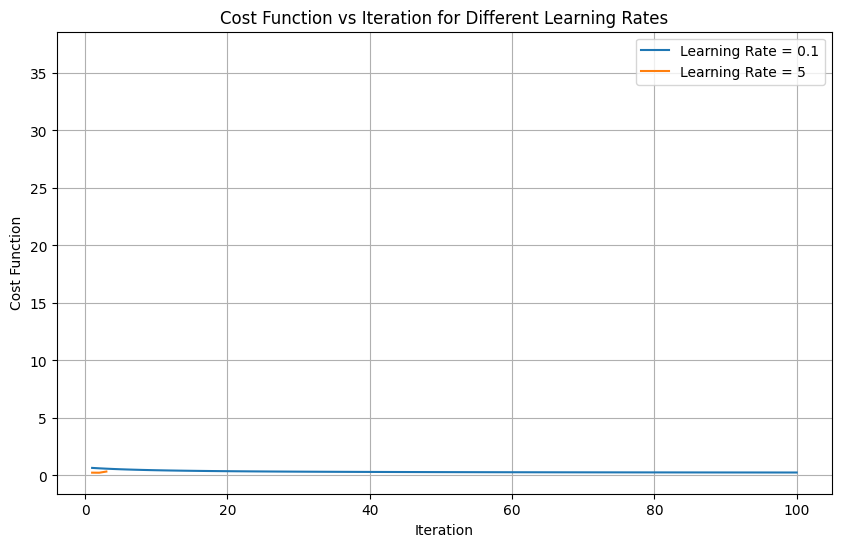

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('independent_variable.csv')
y = pd.read_csv('dependent_variable.csv')

X = X.values
y = y.values

X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

theta = np.zeros((X.shape[1], 1))

alphas = [0.1, 5]
num_iters = 100

plt.figure(figsize=(10, 6))

for alpha in alphas:
    _, costs = gradient_descent(X, y, theta, alpha, num_iters)
    iterations = range(1, num_iters + 1)
    plt.plot(iterations, costs, label=f'Learning Rate = {alpha}')

plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

X = pd.read_csv('independent_variable.csv')
y = pd.read_csv('dependent_variable.csv')

X = X.values
y = y.values.flatten()

X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return np.round(sigmoid(X @ theta))

def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TN = conf_matrix[0, 0]

    accuracy = (TP + TN) / np.sum(conf_matrix)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    return accuracy, precision, recall

theta = np.zeros((X.shape[1], 1))


_, costs = gradient_descent(X, y.reshape(-1, 1), theta, alpha=0.1, num_iters=1000)


y_pred = predict(X, theta)

conf_matrix = confusion_matrix(y, y_pred)

accuracy, precision, recall = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[44  5]
 [ 7 43]]
Accuracy: 0.8787878787878788
Precision: 0.8958333333333334
Recall: 0.86
